In [1]:
import pandas as pd
#import janitor as jn

In [2]:
pd.set_option('max_columns', None)

## Charger les données

In [3]:
data = pd.read_pickle("../../data/processed/maison.pkl")
#data.to_pickle("../../data/processed/maison.pkl")

In [5]:
# Afficher la table initiale
print(data.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315650 entries, 0 to 315649
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   valeur_fonciere            315650 non-null  float64 
 1   adresse_code_voie          315650 non-null  category
 2   code_postal                315650 non-null  category
 3   code_commune               315650 non-null  category
 4   code_departement           315650 non-null  category
 5   surface_reelle_bati        315650 non-null  float64 
 6   nombre_pieces_principales  315650 non-null  float64 
 7   code_nature_culture        315650 non-null  category
 8   surface_terrain            315650 non-null  float64 
dtypes: category(5), float64(4)
memory usage: 14.1 MB
None


## Traitement des données

In [6]:
num_features = data.select_dtypes("float").columns
categ_features = data.select_dtypes("category").columns

In [7]:
data[categ_features] = data[categ_features].astype("str")

In [8]:
#data["code_postal"] = data["code_postal"].astype("str")
cat_f_to_keep = ["code_postal"]
cat_f_to_ignore = categ_features[categ_features!=cat_f_to_keep[0]]

target = 'valeur_fonciere'

num_f_to_keep = list(num_features[num_features!=target])

In [24]:
sub_pc = (data["code_postal"].value_counts().cumsum()<40000)
list_sub_pc = list(sub_pc.index[sub_pc])
df = data[data["code_postal"].isin(list_sub_pc)]

df = df[(df["valeur_fonciere"]>30000) & (df["valeur_fonciere"]<300000)]
print(data.shape, df.shape)

(315650, 9) (29500, 9)


In [9]:
df = data[(data["valeur_fonciere"]>30000) & (data["valeur_fonciere"]<300000)].sample(40000)
print(data.shape, df.shape)

(315650, 9) (40000, 9)


## Pycaret - Regression

PROB : pour la scission des données, faire proportionnel dans chaque classe. Mais il y a peut-etre des classes manquantes dans les données d'entrainement que l'on a seulement dans l'ensemble de test.

In [10]:
from pycaret.regression import *

In [ ]:
exp_reg101 = setup(data = df, target = target, ignore_features=cat_f_to_ignore, categorical_features=cat_f_to_keep,
                   remove_outliers=True,
                   polynomial_features = True, trigonometry_features = True, feature_interaction=True,
                   normalize = True, normalize_method="robust", transformation = True, transform_target = True, verbose=True, session_id=123)
# normalize_method='robust'

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:01:31
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
valeur_fonciere,Label
code_postal,Categorical
surface_reelle_bati,Numeric
nombre_pieces_principales,Numeric
surface_terrain,Numeric


In [10]:
# exp_reg101 = setup(data = data, target = 'valeur_fonciere', remove_outliers=True,
#                    ignore_features=cat_features, create_clusters=True, polynomial_features=True, feature_ratio=True, 
#                    profile=True, session_id=123) 
# exp_reg101 = setup(data = data, target = target, remove_outliers=True, categorical_features=cat_f_tokeep,
#                    numeric_features=num_f_tokeep, ignore_features=cat_f_toignore,
#                    session_id=123) 

In [27]:
compare_models(exclude=["catboost", "svm", "et", "tr", "rf", "ransac", "gbr","ada"], fold=5, n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Ridge Regression,34911.9149,2054261453.4078,45322.8770,0.4954,0.3295,0.2779,0.0352
1,Bayesian Ridge,34922.0201,2054299928.1058,45323.2792,0.4954,0.3295,0.2780,0.1452
2,Linear Regression,34890.7127,2055301911.5425,45334.4956,0.4952,0.3295,0.2776,0.0506
3,Light Gradient Boosting Machine,35342.7775,2067835345.8773,45472.1438,0.4921,0.3312,0.2819,1.6606
4,Huber Regressor,34732.1259,2072803807.4397,45526.5250,0.4908,0.3304,0.2770,2.4478
5,Extreme Gradient Boosting,36082.4193,2184316981.5978,46735.8362,0.4636,0.3389,0.2869,4.2603
6,K Neighbors Regressor,42307.5724,2953908205.2875,54343.3184,0.2746,0.3935,0.3422,0.4428
7,Orthogonal Matching Pursuit,43810.9552,3018374862.3180,54935.3504,0.2588,0.3934,0.3524,0.0528
8,AdaBoost Regressor,48015.9403,3480663118.6773,58995.1556,0.1453,0.4242,0.3940,3.5022
9,Lasso Regression,52576.8284,4097012436.5459,64005.2000,-0.0059,0.4625,0.4421,0.0320


[Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=123, solver='auto', tol=0.001),
 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)]

In [76]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


## Restes

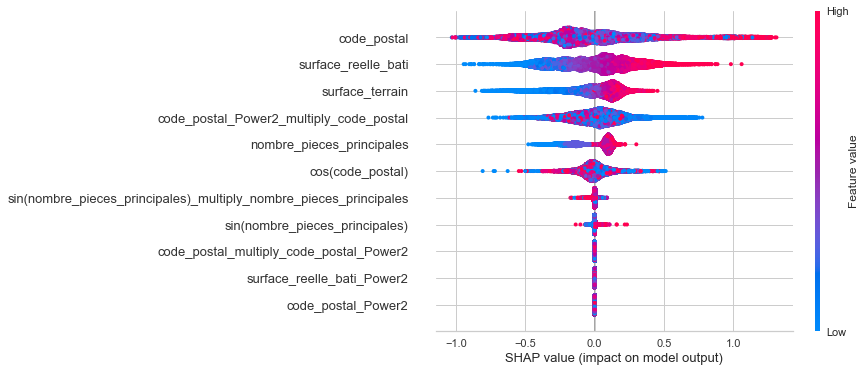

In [43]:
interpret_model(xg_reg)

In [39]:
xg_reg = automl(use_holdout=False)
xg_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

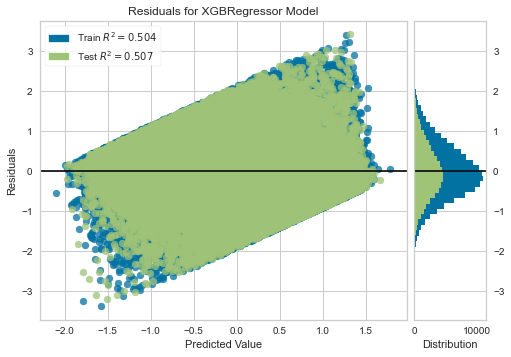

In [40]:
plot_model(xg_reg, plot = 'residuals')

In [44]:
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,39736.0723,2.565547e+09,50651.2283,0.4577,0.3957,0.3535
1,39352.2820,2.513271e+09,50132.5334,0.4568,0.3913,0.3478
2,39910.6250,2.574936e+09,50743.8245,0.4547,0.3936,0.3495
3,39339.3187,2.493625e+09,49936.2053,0.4641,0.3901,0.3463
4,39258.1628,2.518463e+09,50184.2926,0.4606,0.3897,0.3454
5,39618.8740,2.528085e+09,50280.0614,0.4680,0.3968,0.3544
6,39583.4307,2.519554e+09,50195.1633,0.4621,0.3936,0.3500
7,39413.9794,2.536544e+09,50364.1125,0.4568,0.3901,0.3424
8,39298.3481,2.500677e+09,50006.7745,0.4701,0.3868,0.3404
9,39918.4676,2.560650e+09,50602.8659,0.4575,0.3943,0.3508


In [27]:
xg_reg = create_model("xgboost")
tune_xg_reg = tune_model(xg_reg, n_iter=100, fold=10, choose_better=True)
print(tune_xg_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44576.4539,3104726149.6542,55720.0695,0.3437,0.4331,0.4011
1,43949.9931,3033667640.3680,55078.7404,0.3444,0.4266,0.3918
2,44538.0136,3102183120.8367,55697.2452,0.3431,0.4278,0.3920
3,44043.9123,3012690857.4954,54887.9846,0.3526,0.4255,0.3914
4,44148.8742,3050455789.1344,55230.9315,0.3467,0.4252,0.3913
5,44402.1088,3068037455.6279,55389.8678,0.3543,0.4346,0.4023
6,44482.3415,3078309712.0922,55482.5172,0.3428,0.4304,0.3961
7,44194.5055,3073193496.2431,55436.3914,0.3419,0.4259,0.3867
8,44332.3070,3072797715.7120,55432.8216,0.3488,0.4237,0.3861
9,44749.6492,3111418326.7706,55780.0890,0.3409,0.4313,0.3971


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)


In [23]:
tune_xg_reg2 = tune_model(tune_xg_reg2, n_iter=10, fold=10, choose_better=True)
print(tune_xg_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,45350.1437,3198187124.8203,56552.5165,0.3239,0.4396,0.4096
1,44748.0936,3121164871.4950,55867.3865,0.3254,0.4333,0.4009
2,45353.1030,3192185568.8816,56499.4298,0.3240,0.4344,0.4009
3,44844.5724,3105324465.5934,55725.4382,0.3327,0.4321,0.3999
4,44915.9195,3136135105.6252,56001.2063,0.3283,0.4314,0.3994
5,45264.0921,3164230542.4181,56251.4937,0.3341,0.4412,0.4115
6,45272.0492,3168108403.3449,56285.9521,0.3237,0.4367,0.4044
7,44905.7145,3159551321.8465,56209.8863,0.3234,0.4317,0.3942
8,45168.5800,3161978148.4705,56231.4694,0.3300,0.4297,0.3942
9,45457.1527,3195986141.2710,56533.0535,0.3230,0.4374,0.4049


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)


In [22]:
print(tune_xg_reg2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)


In [18]:
finalize_model(xg_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [19]:
save_model(xg_reg,'../../models/final_xg_reg_for_streamlit_test')

Transformation Pipeline and Model Succesfully Saved


In [17]:
predict_model(xg_reg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,38673.256,2.410887e+09,49100.7869,0.4855,0.384,0.3401


,code_postal,surface_reelle_bati,nombre_pieces_principales,surface_terrain,0,Label
0,1.189652,-0.200284,0.753267,0.967269,100000.0,111985.242188
1,-0.618130,-0.310815,0.028430,-0.990576,176000.0,185663.875000
2,-0.913657,-0.273568,-0.796368,1.285817,70000.0,132432.796875
3,-0.367950,-0.348460,0.028430,0.700016,163000.0,151532.218750
4,1.533669,0.076059,2.614249,1.880233,60000.0,104533.992188
...,...,...,...,...,...,...
58384,-1.346044,0.599905,0.753267,0.775659,290000.0,221945.375000
58385,0.485380,-0.745987,-1.699751,1.869511,42000.0,102564.656250
58386,-0.248298,-2.565248,-2.662058,-1.683574,36000.0,70767.445312
58387,-1.373424,1.225209,0.753267,-1.110454,90000.0,116672.375000


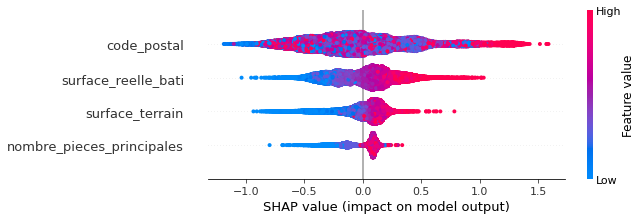

In [40]:
interpret_model(xg_reg)

In [ ]:
rf_reg = create_model("rf")
tune_rf_reg = tune_model(rf_reg, n_iter=100, fold=10, choose_better=True)
print(tune_rf_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,101941.5736,1185235903353.2676,1088685.4015,0.3085,0.6638,89.7247
1,102405.6284,1070042493380.3782,1034428.5830,0.3243,0.6537,43.6239
2,97199.1788,1057774020960.2828,1028481.4150,0.2311,0.6300,77.1249
3,98761.4857,1079895666313.7017,1039180.2858,0.4564,0.6503,72.0375
4,102355.5114,1110296444967.5017,1053706.0524,0.4701,0.6532,57.9974
5,118775.9852,1860377718391.4087,1363956.6409,0.5057,0.6644,155.0987
6,107571.1480,1371601415556.7402,1171153.8821,0.3522,0.6650,68.1238
7,97694.1551,1088662560687.4922,1043389.9370,0.1796,0.6215,24.0036
8,109285.1540,1115375805570.0295,1056113.5382,0.3894,0.6497,42.7397
9,101256.5633,1026520151012.0402,1013173.3075,0.3515,0.6510,81.5520


IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:04:11
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [30]:
compare_models(whitelist=["catboost", "svm"], fold=5, n_select=2)

IntProgress(value=0, description='Processing: ', max=22)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:47:40
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,55534.6555,5.675923e+09,75336.4663,0.4322,0.3981,0.3397,16.8006
1,Support Vector Machine,67543.0366,8.086646e+09,89923.4991,0.1910,0.4720,0.4178,446.8648


KeyboardInterrupt: 

In [ ]:
compare_models(blacklist=["catboost"], fold=5, n_select=1)

In [55]:
catboost_reg = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,153879.8389,1516848443483.4136,1231604.0125,0.1150,0.8778,222.2462
1,159921.8431,1469209828545.4661,1212109.6603,0.0722,0.8639,67.1498
2,154943.1320,1315770525651.9734,1147070.4101,0.0435,0.8497,149.4962
3,160070.7253,1501250121079.3474,1225255.1249,0.2443,0.8899,84.9686
4,152027.7980,1411708335984.9258,1188153.3302,0.3263,0.8521,131.5565
5,166972.5751,2667109808797.1855,1633128.8402,0.2913,0.8422,127.1546
6,161216.0760,1405909353646.0552,1185710.4847,0.3360,0.8708,98.6275
7,151472.4577,1307539535792.7527,1143476.9503,0.0146,0.8534,82.8155
8,158055.8355,1344974381858.4451,1159730.3057,0.2638,0.8417,70.5573
9,154202.5273,1234708375946.6001,1111174.3229,0.2200,0.8764,184.8394


NameError: name 'create' is not defined

In [28]:
tune_huber_reg = tune_model(huber_reg, n_iter=100, fold=10, choose_better=True)
print(tune_huber_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,182277.3795,3521251624600.9077,1876499.8334,-0.0070,0.9648,88.1958
1,148287.0235,1772532323155.0186,1331364.8347,-0.0086,0.8453,43.5277
2,131636.5448,2944803314847.2573,1716042.9234,-0.0012,0.7593,23.2849
3,135712.8981,1673988513130.8130,1293827.0801,-0.0083,0.8288,54.7847
4,164017.3203,4224876850647.1816,2055450.5225,-0.0035,0.8681,88.7733
5,151360.6144,2257137380601.1055,1502377.2431,-0.0053,0.8455,93.5920
6,141209.6568,1587388268032.8569,1259915.9766,-0.0071,0.8652,85.2319
7,134392.0145,1982206513203.2141,1407908.5600,-0.0034,0.8854,146.4512
8,236970.2725,31566707842737.6445,5618425.7442,-0.0012,0.7647,0.7968
9,149160.8400,1344014644181.6892,1159316.4556,-0.0071,0.8657,51.7220


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 11
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)


In [26]:
#evaluate_model(tune_huber_reg)

In [29]:
interpret_model(tune_huber_reg)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
ERROR:logs:shap library not found. pip install shap to use interpret_model function.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\sbeau\anaconda3\envs\pycaret\lib\site-packages\pycaret\regression.py", line 8592, in interpret_model
    import shap
ModuleNotFoundError: No module named 'shap'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sbeau\anaconda3\envs\pycaret\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-d11f4b2db9b3>", line 1, in <module>
    interpret_model(tune_huber_reg)
  File "C:\Users\sbeau\anaconda3\envs\pycaret\lib\site-packages\pycaret\regression.py", line 8595, in interpret_model
    sys.exit("shap library not found. pip install shap to use interpret_model function.")
SystemExit: shap library not found. pip install shap to use interpret_model function.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C

TypeError: object of type 'NoneType' has no len()

In [8]:
exp_reg102 = setup(data = data, target = 'valeur_fonciere', remove_outliers=True,
                   ignore_features=cat_features, polynomial_features=True,
                   session_id=124) 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,124
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(315650, 9)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
compare_models(blacklist=["catboost","svm"], fold=5, n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Linear Regression,162873.0885,1941659636956.8032,1383530.9977,0.0007,0.9426,132.2528,0.0130
1,Lasso Regression,162873.0786,1941659637080.3015,1383530.9974,0.0007,0.9426,132.2529,0.2604
2,Ridge Regression,162873.0875,1941659636814.6189,1383530.9976,0.0007,0.9426,132.2528,0.0114
3,Elastic Net,162884.9016,1941680277763.9805,1383537.3851,0.0007,0.9443,132.5356,0.2542
4,Least Angle Regression,162873.0885,1941659636956.7903,1383530.9977,0.0007,0.9426,132.2528,0.0148
5,Lasso Least Angle Regression,162729.7630,1941674811203.3369,1383534.9789,0.0007,0.9438,132.5459,0.0128
6,Orthogonal Matching Pursuit,162588.6537,1941973364566.8484,1383644.0566,0.0006,0.9472,131.5267,0.0134
7,Bayesian Ridge,163157.9993,1942065747663.5989,1383669.1248,0.0005,0.9540,133.4003,0.0362
8,Random Sample Consensus,152304.0916,1942400609272.5181,1383801.6160,0.0003,0.8917,119.0736,1.6440
9,Huber Regressor,143812.4524,1951951525041.3765,1387292.2769,-0.0049,0.8416,67.0953,0.6374


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [9]:
lr_reg = create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,171426.4996,2713858375007.1709,1647379.2444,0.0005,0.9546,159.0783
1,161420.7462,1717028809414.7886,1310354.4595,0.0010,0.9189,69.6743
2,157984.9546,1619855524436.3591,1272735.4495,0.0015,0.9290,101.6399
3,148829.7615,1072215697781.3438,1035478.4874,0.0014,0.9359,97.9849
4,185108.7874,3432606604464.2910,1852729.5012,0.0001,0.9591,203.2170
5,149771.9128,1402695986199.8347,1184354.6708,0.0012,0.9264,112.7381
6,163940.3867,1662828485443.2749,1289507.0707,0.0004,0.9605,190.7827
7,154245.3474,1244483183422.8623,1115564.0651,0.0002,0.9610,161.7762
8,183514.5341,3201422579207.8516,1789251.9608,0.0001,0.9352,70.8300
9,152414.3005,1349735623873.8271,1161781.2289,0.0012,0.9449,154.2712


In [10]:
tune_lr_reg = tune_model(lr_reg, n_iter=100, fold=10, choose_better=True)
print(tune_lr_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,171426.4996,2713858375007.1709,1647379.2444,0.0005,0.9546,159.0783
1,161420.7462,1717028809414.7886,1310354.4595,0.0010,0.9189,69.6743
2,157984.9546,1619855524436.3591,1272735.4495,0.0015,0.9290,101.6399
3,148829.7615,1072215697781.3438,1035478.4874,0.0014,0.9359,97.9849
4,185108.7874,3432606604464.2910,1852729.5012,0.0001,0.9591,203.2170
5,149771.9128,1402695986199.8347,1184354.6708,0.0012,0.9264,112.7381
6,163940.3867,1662828485443.2749,1289507.0707,0.0004,0.9605,190.7827
7,154245.3474,1244483183422.8623,1115564.0651,0.0002,0.9610,161.7762
8,183514.5341,3201422579207.8516,1789251.9608,0.0001,0.9352,70.8300
9,152414.3005,1349735623873.8271,1161781.2289,0.0012,0.9449,154.2712


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [11]:
interpret_model(tune_lr_reg)

SystemExit: (Type Error): This function only supports tree based models.

In [13]:
blend_all = blend_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,167176.9786,2724343225044.1963,1650558.4585,-0.0034,0.9166,90.5470
1,163951.1079,1751305920408.6069,1323369.1550,-0.0190,0.9125,54.9320
2,163266.1005,1656227179514.1777,1286944.9015,-0.0210,0.9272,79.1329
3,150894.5866,1073906040854.8602,1036294.3794,-0.0001,0.9299,75.6240
4,190618.6694,3430964351795.9150,1852286.2500,0.0005,0.9591,169.7003
5,149268.0524,1425711626294.9802,1194031.6689,-0.0152,0.9127,95.0314
6,165007.8583,1692560394827.4346,1300984.3945,-0.0175,0.9524,160.2876
7,153028.5009,1266499531364.2041,1125388.6135,-0.0175,0.9387,143.7969
8,182901.8045,3225426712170.8438,1795947.3022,-0.0074,0.9159,63.2303
9,157498.6459,1391512195215.5908,1179623.7515,-0.0297,0.9422,109.4000


In [25]:
data["code_postal"] = data["code_postal"].apply(lambda x: f"{x}")

In [26]:
data["code_postal"]

0          1400
1          1400
2          1400
3          1640
4          1640
          ...  
315645    97426
315646    97413
315647    97413
315648    97413
315649    97413
Name: code_postal, Length: 315650, dtype: category
Categories (5678, object): ['1000', '1090', '1100', '1110', ..., '97460', '97470', '97480', '97490']

In [ ]:
pd.Series.apply()